In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, multivariate_normal

np.set_printoptions(suppress = True)                    # уберем scientific notation



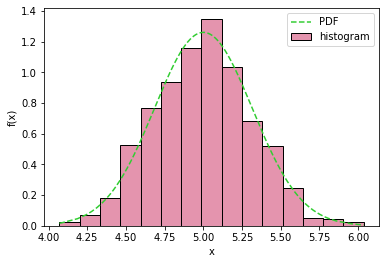

In [2]:
# --------
# Часть №1. Выборочные характеристики
# --------

# Сформируем выборку из Хи-квадрат
# распределения с df степенями свободы
np.random.seed(123)                                     # для воспроизводимости результатов, полученных с использованием
                                                        # выборок, необходима установка случайного зерна
n = 100                                                 # переменная, хранящая объем выборки
df = 5                                                  # переменная, хранящая число степеней свободы
x = chi2.rvs(size = n,                                  # объем выборки
             df = df)                                   # число степеней свободы

# Рассчитаем основные выборочные характеристики
np.mean(x)                                              # выборочное среднее
np.var(x)                                               # выборочная дисперсия
np.var(x, ddof = 1)                                     # скорректированная выборочная дисперсия
np.median(x)                                            # выборочная медиана
np.quantile(x, 0.3)                                     # выборочная квантиль уровня 0.3
np.mean(x ** 3)                                         # выборочный начальный момент 3-го порядка
np.sort(x)                                              # реализация вариационного ряда

# Визуализируем, приблизительно, распределение
# выборочного среднего при помощи гистограммы
    # Сперва получим выборку из
    # выборочных средних, используя для
    # этого несколько независимых выборок
    # равного объема из одного и того
    # же распределения
m = 1000                                                # количество независимых выборок равного объема
                                                        # из одного и того же распределения
x_mean = np.empty(m)                                    # вектор, который будет содержать выборку
                                                        # из реализаций выборочного среднего
for i in range(0, m):
    x_new = chi2.rvs(size = n, df = df)
    x_mean[i] = np.mean(x_new)
x_mean = np.sort(x_mean)                                # для удобства отсортируем реализации выборочных средних
    # Воспользуемся гистограммой
f_x = norm.pdf(x_mean, loc = df,                        # при помощи ЦПТ находим истинное распределение выборочного
               scale = math.sqrt(2 * df / n))           # среднего и считаем по нему значения функции плотности
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('f(x)')                                      # название верхней оси графика
plt.plot(x_mean, f_x, '--', markersize = 20,            # график теоретической функции распределения (по ЦПТ)
  label = "PDF", color = "limegreen")
seaborn.histplot(x_mean, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 15)                             # число столбиков в Гистограмме
plt.legend()



In [3]:
# --------
# Часть №2. Характеристики зависимых выборок
# --------

# Симулируем выборку из двумерного
# нормального распределения
    # Зададим параметры распределения X и Y
mu_X = 100                                              # E(X)
mu_Y = 110                                              # E(Y)
var_X = 25                                              # Var(X)
var_Y = 36                                              # Var(Y)
corr_XY = -0.5                                          # Corr(X, Y)
cov_XY = math.sqrt(var_X * var_Y) *  corr_XY            # Cov(X, Y)
    # Зададим параметры распределения
    # случайного вектора (X, Y)
mu = np.array([mu_X, mu_Y])                             # E((X, Y))
sigma = np.array([[var_X, cov_XY],                      # Cov((X, Y))
                  [cov_XY, var_Y]])
    # Симулируем выборку
n = 1000
s = multivariate_normal.rvs(size = n,                   # объем выборки
                             mean = mu,                 # E((X, Y))
                             cov = sigma)               # Cov((X, Y))
x = s[:, 0]                                             # реализации первой выборки
y = s[:, 1]                                             # реализации второй выборки

# Рассмотрим выборочные характеристики, описывающие
# зависимость между X и Y
np.cov(x, y)                                            # выборочная ковариационная матрица
np.corrcoef(x, y)                                       # выборочная корреляционная матрица



array([[ 1.       , -0.4676073],
       [-0.4676073,  1.       ]])

In [4]:
# Задания
# 1. Визуализируйте для выборки объема 5000 из распределения
#    Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
#    распределение:
#    1)     Второго начального выборочного момента
#    2)     Выборочной дисперсии
#    3)     Выборочной медианы
#    4)     Третьей порядковой статистики, то есть
#           третьего элемента вариационного ряда
#    5)     Выборочной квантили уровня 0.8
#    6)     Выборочной функции распределения в точке 5

# и сразу будем делать второе задание (лаймовым)
# 2. Повторите первый пункт, но визуализируя не
#    выборочные, а истинные распределения. В некоторых
#    пунктах удобно использовать ЦПТ, в других - распределение
#    необходимо выводить иными способами.

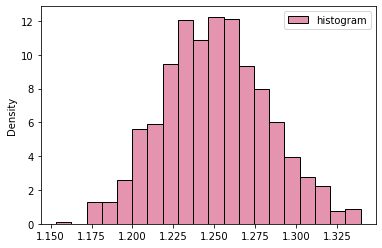

In [54]:
# 1
l = 1000
s = t.rvs(size = 5000,                         # объем выборки
      df = 10)                              # число степеней свободы

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] = np.mean(s_new ** 2)
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)    # число столбиков в Гистограмме

plt.legend();

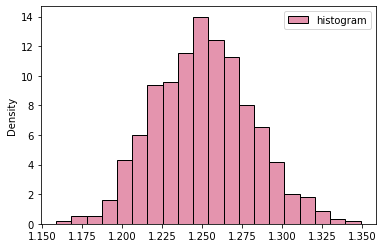

In [6]:
# 2
l = 1000

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] = np.var(s_new)
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

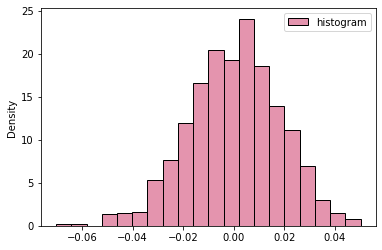

In [7]:
# 3
l = 1000

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] = np.median(s_new)
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

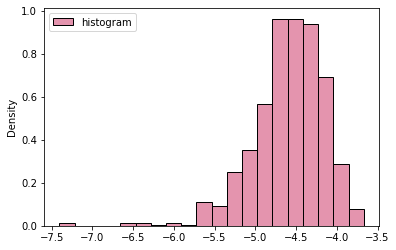

In [8]:
# 4
l = 1000

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] = np.sort(s_new)[2]
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

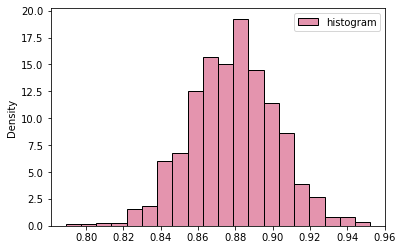

In [9]:
# 5 
l = 1000

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] =np.quantile(s_new, 0.8)
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

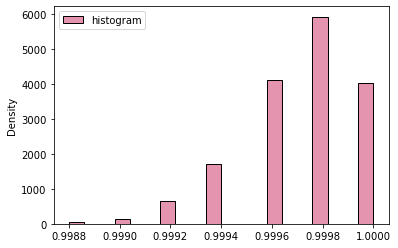

In [10]:
# 6
l = 1000

s_na2 = np.empty(l)
                                                        # из реализаций выборочного среднего
for i in range(0, l):
    s_new = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
    s_na2[i] =np.mean(s_new <= 5)
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

In [11]:
# 4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать
#    1)     Выборочное среднее
#    2)     Выборочную дисперсию
#    3*)    Выборочную медиану
#    4)     Порядковые статистики
#    5*)    Выборочную ковариационную матрицу

In [12]:
# 1
r = t.rvs(size = 5000,                         # объем выборки
      df = 10) 
def mean(x):
    return np.sum(x)/len(x)
mean(r)

0.0035830392144730874

In [16]:
# 2
def var(x):
    return np.sum(x-mean(x) ** 2) / len(x)
var(r)

0.003570201044460656

In [22]:
# 3*)    Выборочную медиану
def median(x):
    return np.quantile(x, 0.5)
median(r)

0.0045464033031222765

In [26]:
# 4)     Порядковые статистики
def ps(x, k):
    return np.sort(x)[k]
ps(r, 30)

-3.0012907735257386

In [47]:
#    5*)    Выборочную ковариационную матрицу
def cov(x, y):
    return np.cov(x, y) # ;)

In [ ]:
# 3. Симулируйте три независимых выборки объемом в 5000 наблюдений
#    из стандартного равномерного распределения. Получите из этих
#    двух выборок две сложив первую со второй, а вторую - с третьей.
#    Для получившихся выборок:
#    1)     Посчитайте выборочную ковариационную матрицу
#    2)     Рассчитайте выборочную корреляционную матрицу
#    3*)    При помощи гистограммы визуализируйте распределение
#           выборочной корреляции

In [28]:
# 1
a = np.random.uniform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
b = np.random.unform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
c = np.random.uniform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
first = a + b
second = b + c

np.cov(first, second)

array([[0.16829097, 0.08302643],
       [0.08302643, 0.17060333]])

In [38]:
# 2 
np.corrcoef(first, second)

array([[1.        , 0.48871222],
       [0.48871222, 1.        ]])

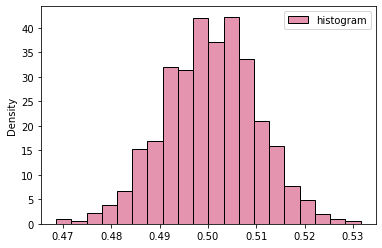

In [40]:
# 3
s_na = np.empty(1000)
for i in range(0, 1000):
    a = np.random.uniform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
    b = np.random.uniform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
    c = np.random.uniform(size = 5000, # объем выборки
                      low = 0,  # наименьшее значение
                      high = 1)
    first = a + b
    second = b + c
    s_na2[i] =np.corrcoef(first, second)[0][1]
s_na2 = np.sort(s_na2) # для удобства отсортируем реализации выборочных средних
seaborn.histplot(s_na2, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)                             # число столбиков в Гистограмме
plt.legend();

In [ ]:
# 5. Симулируйте три независимые выборки: две из стандартного нормального
#    распределения и одну из Хи-Квадрат распределения с двумя степенями
#    свободы. Сформируйте еще одну выборку сложив квадраты выборок из
#    стандартных нормальных распределений. Сравните выборочные характеристики
#    получившейся выборки с выборочными характеристиками выборки из Хи-Квадрат
#    распределения с двумя степенями свободы. Сделайте выводы о причинах
#    налблюдаемого сходства в выборочных характеристиках.

In [44]:
a = norm.rvs(size=50000)
b = norm.rvs(size=50000)
c = chi2.rvs(size = 50000, df = 2)
d = a ** 2 + b ** 2


In [45]:
print('E(X):', np.mean(c), np.mean(d))                                              # выборочное среднее
print('Var:', np.var(c), np.var(d))                                              # выборочная дисперсия                                     # скорректированная выборочная дисперсия
print('Median:',np.median(c), np.median(d))                                           # выборочная медиана

E(X): 1.9937435953517104 1.9856775044278014
Var: 3.9860499691659945 3.920945124140837
Median: 1.3804419773537109 1.3769258469057184


Схожесть наблюдается, потому что хи-квадрат с df=2 это и есть сумма квадратов двух с.н.р св

In [46]:
# 2. Повторите первый пункт, но визуализируя не
#    выборочные, а истинные распределения. В некоторых
#    пунктах удобно использовать ЦПТ, в других - распределение
#    необходимо выводить иными способами.

Не знать((((